## 1 Импорт библиотек, инициализация переменных

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db_config = {'user': 'student',
             'password': 'qweasd963', 
             'host': '89.208.197.76', 
             'port': 5432,
             'db': 'simulative'} 
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],  
                                                         db_config['password'],  
                                                         db_config['host'],  
                                                         db_config['port'],  
                                                         db_config['db'])
engine = create_engine(connection_string) 

## 2 Анализ базы данных

Имеется тестовая база данных сайта IT Resume, необходимо рассчитать основные продуктовые метрики

Делаем запрос к базе данных, получаем список доступных таблиц

In [3]:
query = '''
SELECT table_name FROM information_schema.tables
WHERE table_schema NOT IN ('information_schema', 'pg_catalog')
AND table_schema IN('public', 'myschema');
'''
tables = pd.io.sql.read_sql(query, con = engine)
table_name = [tables['table_name'][i] for i in range(len(tables))]

In [4]:
table_name

['codesubmit',
 'language',
 'languagetoproblem',
 'page',
 'problem',
 'problem_to_company',
 'coderun',
 'company',
 'users',
 'test',
 'testquestion',
 'userentry',
 'testanswer',
 'testresult',
 'teststart',
 'transaction',
 'transactiontype']

Выводим по 5 первых записей каждой таблицы

In [5]:
for i in range(len(table_name)):
    query = f'''
    SELECT * from {table_name[i]}
    '''
    print(table_name[i])
    df = pd.io.sql.read_sql(query, con = engine).head()
    display(df.head())

codesubmit


,id,created_at,code,problem_id,user_id,is_false,time_spent,language_id
0,1,2021-04-17 17:18:06,Molestias quia saepe dolore asperiores est vol...,30,20,1,None,3
1,2,2021-04-04 06:13:37,Delectus sunt quam et. Et et eos laboriosam ni...,9,8,1,None,3
2,3,2021-04-07 18:29:31,Sint doloremque unde eveniet quia animi. Saepe...,1,1,1,None,3
3,4,2021-03-29 01:38:18,Veniam et amet temporibus nihil et ea qui. Dol...,11,20,1,None,3
4,5,2021-04-13 17:44:10,Distinctio est quos commodi. Exercitationem se...,13,12,1,None,3


language


,id,name
0,1,GO
1,2,SQL
2,3,Python
3,5,JavaScript
4,4,C++


languagetoproblem


,ltp_id,pr_id,lang_id
0,1,1,3
1,2,2,3
2,3,3,3
3,4,4,3
4,5,5,3


page


,id,path,name,title,description,keywords
0,1,/,doyle,IT Resume - Платформа для развития навыков про...,,hayesstrosin
1,2,/404,Страница,IT Resume - Платформа для развития навыков про...,,veum
2,3,/account/creation,Регистрация,Регистрация | IT Resume,,mueller
3,4,/account/login,Логин,Вход | IT Resume,,kerluke
4,5,/account/password-reset,Сброс пароля,Сброс | IT Resume,,waelchi


problem


,id,name,complexity,bonus,task,solution,cost,rating,page_id,solution_cost,priority,company_id,is_visible,is_private,recommendation
0,1,Сумма 2 чисел,1,5,<p>Дан массив целых чисел <code>nums</code> и ...,<inject-highlight>class Answer:\r\n def two...,20,91.0,36,0,890.0,None,True,False,None
1,2,Преобразование массива,1,5,<p>Дан массив целых чисел <code>nums</code> ра...,<inject-highlight>class Answer:\r\n def shu...,20,93.0,37,0,1.0,None,True,False,None
2,3,Задача о детях и конфетах,1,5,<p>Дан массив целых чисел <code>candies</code>...,<inject-highlight>class Answer:\r\n def kid...,0,97.0,38,0,890.0,None,True,False,None
3,4,Задача о «хороших парах»,1,5,<p>Дан массив целых чисел nums. Необходимо пос...,<inject-highlight>from collections import Coun...,20,89.0,39,0,890.0,None,True,False,None
4,5,Числа с четным числом цифр,1,5,<p>Дан массив целых чисел <code>nums</code>. Н...,<inject-highlight>class Answer:\r\n def fin...,20,92.0,40,0,1.0,None,True,False,None


problem_to_company


,id,name,task,cost,company_id,problem_id,bonus,priority
0,1,None,None,None,1,117,None,None
1,2,None,None,None,1,118,None,None
2,3,None,None,None,1,119,None,None
3,4,None,None,None,1,120,None,None
4,5,None,None,None,1,121,None,None


coderun


,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20,13,10,3
1,2,2021-03-31 07:10:06,15,13,3
2,3,2021-04-04 14:55:26,1,6,3
3,4,2021-03-29 21:24:51,26,4,3
4,5,2021-03-30 11:29:12,21,18,3


company


,id,name,description,logo,db_cred,site,welcome_bonus
0,1,Клиент 1,Клиент 1,None,sf,None,NaN
1,2,Клиент 2,Клиент 2,None,None,None,500.0
2,3,Клиент 3,Клиент 3,None,sf,None,NaN
3,4,Клиент 4,Клиент 4,None,None,None,750.0
4,5,Клиент 5,Клиент 5,None,None,None,750.0


users


,id,username,first_name,last_name,is_active,date_joined,email,referal_user,company_id,tier,score
0,198,Pbnnd,None,None,1,2021-11-23 13:58:52.051036,jbsnjbf@gmail.com,NaN,NaN,1,0
1,52,fjbis,Элина,Полякова,1,2021-09-01 12:04:31.148715,fjbis@yandex.ru,NaN,NaN,1,0
2,331,jjxbfox,Эмилия,Афанасьев,1,2021-12-12 07:03:00.583264,jjxbfox@bk.ru,NaN,NaN,1,0
3,416,nsosabisfsobm,None,None,1,2022-01-02 12:22:43.014039,isfsobm.nseo@gmail.com,NaN,1.0,1,0
4,19,Fofbx196,Эмилия,Фролова,1,2021-04-22 15:37:33.000000,koonbnanojj.jofbx@yandex.ru,NaN,NaN,1,0


test


,id,name,page_id,cost,cover,intro,result,complexity,priority,company_id,is_visible,is_private,repeat_cost
0,1,Общий тест по SQL,20,20,blue,"Оцените, насколько хорошо Вы разбираетесь в SQ...","Похоже, Вам нужно немного подтянуть hard skill...",1,99.0,None,True,True,0
1,2,Хитрый тест по SQL,21,30,pink,Сможете пройти наш тест по SQL с подвохом?,"Похоже, Вам нужно немного подтянуть hard skill...",2,98.0,None,True,True,0
2,3,Числовые типы данных в SQL,22,30,pink,"Проверим, насколько хорошо Вы умеете работать ...","Похоже, Вам нужно немного подтянуть hard skill...",2,99.0,None,True,True,0
3,4,Работа с датой и временем в SQL,23,30,dark_blue,"Проверим, насколько хорошо Вы умеете работать ...","Похоже, Вам нужно немного подтянуть hard skill...",2,99.0,None,True,True,0
4,5,«Что выведет SQL-запрос?»,19,30,pink,"Тест, в котором выбрать правильный ответ не та...","Похоже, Вам нужно немного подтянуть hard skill...",2,100.0,None,True,True,0


testquestion


,id,question_num,value,tag,test_id,explanation,explanation_cost,type_question
0,1,1,<p>В каких командах можно использовать LIMIT?<...,SQL,1,,0,None
1,2,2,<p>Какие SQL-операции относятся к DDL?</p>\r\n,SQL,1,,0,None
2,3,3,<p>Что такое транзакция в SQL?</p>\r\n,SQL,1,,0,None
3,4,4,<p>Какая команда открывает транзакцию?</p>\r\n,SQL,1,,0,None
4,5,5,<p>Что не входит в ACID?</p>,SQL,1,,10,None


userentry


,id,entry_at,page_id,user_id
0,1,2021-04-13 08:31:45,4,1
1,2,2021-04-11 16:04:20,5,8
2,3,2021-04-24 07:29:36,9,4
3,4,2021-04-26 20:36:03,2,13
4,5,2021-04-27 16:20:12,5,14


testanswer


,id,option,value,is_correct,question_id
0,1,1,SELECT,False,1
1,2,2,"SELECT, INSERT",False,1
2,3,3,"SELECT, DELETE, UPDATE",True,1
3,4,4,"SELECT, INSERT, UPDATE, DELETE",False,1
4,5,1,"DROP, ALTER",True,2


testresult


,id,created_at,answer_id,question_id,test_id,user_id,value
0,1,2021-05-24 14:22:44.000685,44.0,32,16,2,None
1,2,2021-05-24 14:22:44.000685,49.0,33,16,2,None
2,3,2021-05-24 14:22:44.000685,55.0,34,16,2,None
3,4,2021-05-24 14:22:44.000685,56.0,35,17,2,None
4,5,2021-05-24 14:22:44.000685,62.0,36,17,2,None


teststart


,id,created_at,test_id,user_id
0,1,2021-05-11 02:10:30,2,2
1,2,2021-04-26 17:11:56,11,5
2,3,2021-04-29 23:50:31,1,25
3,4,2021-04-30 18:03:49,5,17
4,5,2021-05-15 15:41:10,11,1


transaction


,id,created_at,value,type_id,user_id
0,1,2021-06-23 10:55:44.535735,100.0,1,2
1,2,2021-06-23 10:57:32.260228,100.0,1,2
2,3,2021-06-23 11:00:31.750230,100.0,1,2
3,4,2021-06-23 11:28:14.502607,1500.0,2,2
4,5,2021-06-23 14:28:50.171772,100.0,1,2


transactiontype


,type,description,value,is_visible,reason,icon,button,tooltip,destination_id,allowed_for
0,1,Списание,NaN,0,None,icon,text on button,text,1,None
1,2,Пополнение кошелька,NaN,0,Баланс пополнен!,icon,text on button,text,1,users
2,3,Регистрация,100.0,1,Добро пожаловать!,key,Создать аккаунт,"Зарегистрируйтесь, и мы сразу начислим Вам при...",3,guests
3,4,Заход на платформу,3.0,1,Ежедневный бонус!,entrance,Войти,"За каждый новый день, что Вы проведете с нами,...",4,guests
4,5,Недельный марафон,30.0,1,7 дней подряд - это сильно!,bottle,Войти,Решайте задачи и тесты 7 дней подряд и получит...,4,guests


Задача - рассчитать продуктовые метрики, поэтому работать будем с таблицами users, userentry и transaction.

In [6]:
query = 'SELECT * from users LIMIT 10'
pd.io.sql.read_sql(query, con = engine)

,id,username,first_name,last_name,is_active,date_joined,email,referal_user,company_id,tier,score
0,198,Pbnnd,None,None,1,2021-11-23 13:58:52.051036,jbsnjbf@gmail.com,None,NaN,1,0
1,52,fjbis,Элина,Полякова,1,2021-09-01 12:04:31.148715,fjbis@yandex.ru,None,NaN,1,0
2,331,jjxbfox,Эмилия,Афанасьев,1,2021-12-12 07:03:00.583264,jjxbfox@bk.ru,None,NaN,1,0
3,416,nsosabisfsobm,None,None,1,2022-01-02 12:22:43.014039,isfsobm.nseo@gmail.com,None,1.0,1,0
4,19,Fofbx196,Эмилия,Фролова,1,2021-04-22 15:37:33.000000,koonbnanojj.jofbx@yandex.ru,None,NaN,1,0
5,53,Девелопер,Варвара,Демина,1,2021-09-01 12:24:50.902332,885be6686j62@mail.ru,None,NaN,1,0
6,54,nsnodnsobmb87,None,None,1,2021-09-01 12:28:37.867603,nsnodnsobmb87@mail.ru,None,NaN,1,0
7,55,babmxsdbm,Дмитрий,Синицына,1,2021-09-01 12:29:24.530603,abmxs-bnfxos@yandex.ru,None,NaN,1,5
8,1024,Fbxbjbnbmb,None,None,1,2022-02-01 08:40:49.450972,jbxbjbnbmb.sxsnb@gmail.com,None,NaN,1,0
9,1092,Eonbxsabnbmb,None,None,1,2022-02-03 13:40:09.879346,skkbxabdobao@gmail.com,None,NaN,1,0


* **id** — индетификатор пользователя
* **username** — никнейм
* **first_name** — имя
* **last_name** — фамилия
* **is_active** — активен ли пользователь(0, 1)
* **date_joined** — дата регистрации пользователя;
* **email** — email пользователя;
* **company_id** — индетификатор компании, где пользователь числится студентом.

In [7]:
query = 'SELECT * from userentry LIMIT 10'
pd.io.sql.read_sql(query, con = engine)

,id,entry_at,page_id,user_id
0,1,2021-04-13 08:31:45,4,1
1,2,2021-04-11 16:04:20,5,8
2,3,2021-04-24 07:29:36,9,4
3,4,2021-04-26 20:36:03,2,13
4,5,2021-04-27 16:20:12,5,14
5,6,2021-04-05 12:29:11,10,20
6,7,2021-04-04 16:32:55,8,11
7,8,2021-04-28 05:55:47,7,12
8,9,2021-04-14 09:51:30,10,18
9,10,2021-04-05 12:05:20,7,6


* **id** — индетификатор захода
* **entry_at** — дата захода на платформу
* **page_id** — индетификатор страницы
* **user_id** — индетификатор пользователя

In [8]:
query = 'SELECT * from transaction LIMIT 10'
pd.io.sql.read_sql(query, con = engine)

,id,created_at,value,type_id,user_id
0,1,2021-06-23 10:55:44.535735,100,1,2
1,2,2021-06-23 10:57:32.260228,100,1,2
2,3,2021-06-23 11:00:31.750230,100,1,2
3,4,2021-06-23 11:28:14.502607,1500,2,2
4,5,2021-06-23 14:28:50.171772,100,1,2
5,6,2021-06-23 14:33:25.068118,100,1,2
6,7,2021-08-04 09:12:44.752707,50,3,50
7,8,2021-08-04 11:03:24.436018,3,4,50
8,9,2021-08-13 14:15:30.525357,3,4,43
9,10,2021-08-18 10:10:06.999186,3,4,50


* **id** — идентификатор транзакции
* **created_at** — дата транзакции
* **value** — стоимость транзакции
* **type_id** — тип транзакции
* **user_id** — индетификатор пользователя

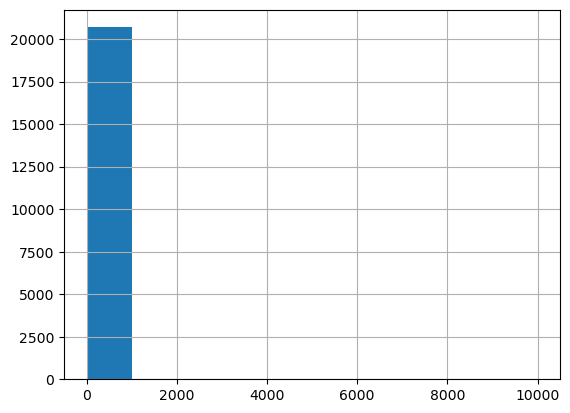

In [9]:
query = 'SELECT * from transaction'
pd.io.sql.read_sql(query, con = engine)
df = pd.io.sql.read_sql(query, con = engine)
#df.groupby('user_id')['value'].sum().sort_values(ascending = False)
df['value'].hist()
plt.show()

## 3 Расчет продуктовых метрик

### 3.1 Рассчитываем DAU

DAU - Daily Active Users
DAU показывает количество пользователей, использовавших продукт в течении дня.

In [10]:
dau = '''
SELECT TO_CHAR(entry_at, 'YYYY-MM-dd') as date,
       COUNT(DISTINCT user_id) as DAU
FROM userentry
GROUP BY 1
ORDER BY 1
'''
dau_check = pd.io.sql.read_sql(dau, con = engine)
dau_check.head()

,date,dau
0,2021-03-29,2
1,2021-03-31,1
2,2021-04-01,2
3,2021-04-02,3
4,2021-04-03,1


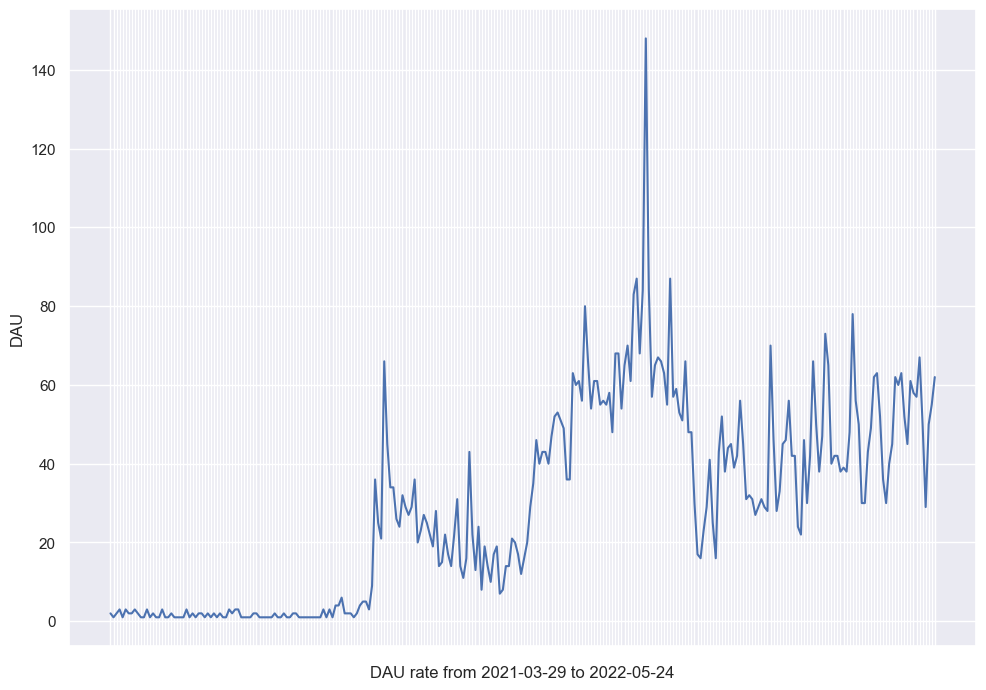

In [11]:
first_day = dau_check['date'].sort_values()[0]
last_day = dau_check['date'].sort_values(ascending = False).reset_index(drop = True)[0]
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(dau_check, x = dau_check['date'], y = dau_check['dau'])
ax.set(xticklabels='')  
ax.set(xlabel=f'DAU rate from {first_day} to {last_day}', ylabel = 'DAU')
plt.show()

### 3.2 Рассчитываем WAU

WAU - Weekly Active Users
WAU показывает количество пользователей, использовавших продукт в течении недели.

In [12]:
wau = '''
SELECT TO_CHAR(entry_at, 'YY-WW') as week,
       COUNT(DISTINCT user_id) as WAU
FROM userentry
GROUP BY week
ORDER BY week
'''
wau_check = pd.io.sql.read_sql(wau, con = engine)
wau_check.head()

,week,wau
0,21-13,5
1,21-14,9
2,21-15,8
3,21-16,3
4,21-17,9


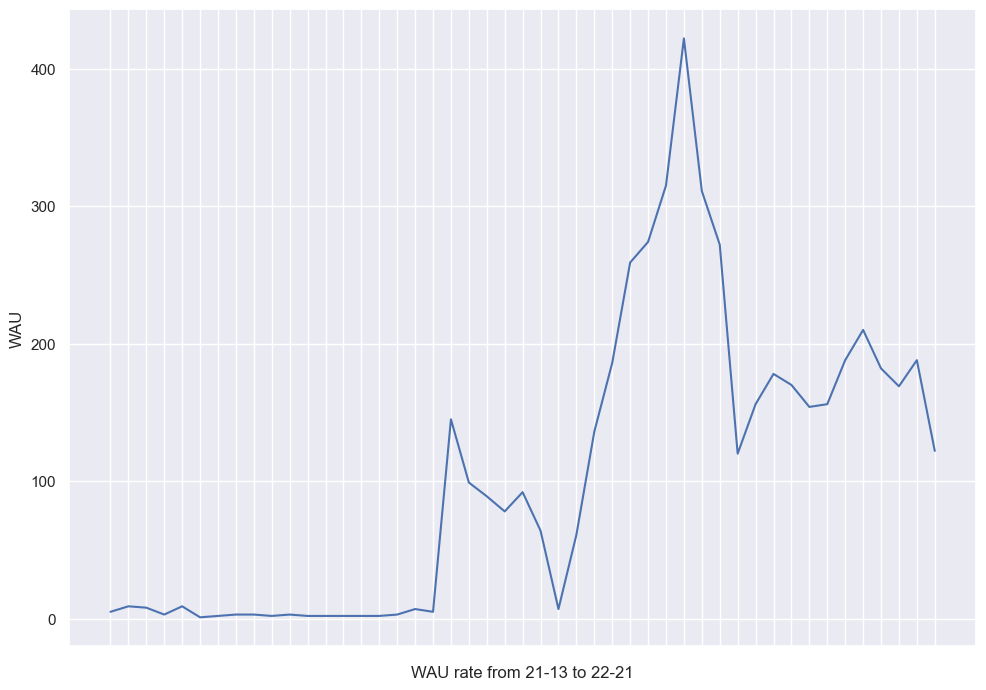

In [13]:
first_day = wau_check['week'].sort_values()[0]
last_day = wau_check['week'].sort_values(ascending = False).reset_index(drop = True)[0]
ax = sns.lineplot(wau_check, x = wau_check['week'], y = wau_check['wau'])
ax.set(xticklabels='')  
ax.set(xlabel=f'WAU rate from {first_day} to {last_day}', ylabel = 'WAU')
plt.show()

### 3.3 Рассчитываем MAU

MAU - Monthly Active Users
MAU показывает количество пользователей, использовавших продукт в течении месяца.

In [14]:
mau = '''
SELECT TO_CHAR(entry_at, 'YYYY-MM') as month,
       TO_CHAR(entry_at, 'Mon YYYY') as str_month,
       COUNT(DISTINCT user_id) as MAU
FROM userentry
GROUP BY 1, 2
ORDER BY month
'''
mau_check = pd.io.sql.read_sql(mau, con = engine)
mau_check

,month,str_month,mau
0,2021-03,Mar 2021,3
1,2021-04,Apr 2021,17
2,2021-08,Aug 2021,2
3,2021-09,Sep 2021,4
4,2021-10,Oct 2021,3
5,2021-11,Nov 2021,189
6,2021-12,Dec 2021,202
7,2022-01,Jan 2022,584
8,2022-02,Feb 2022,1061
9,2022-03,Mar 2022,575


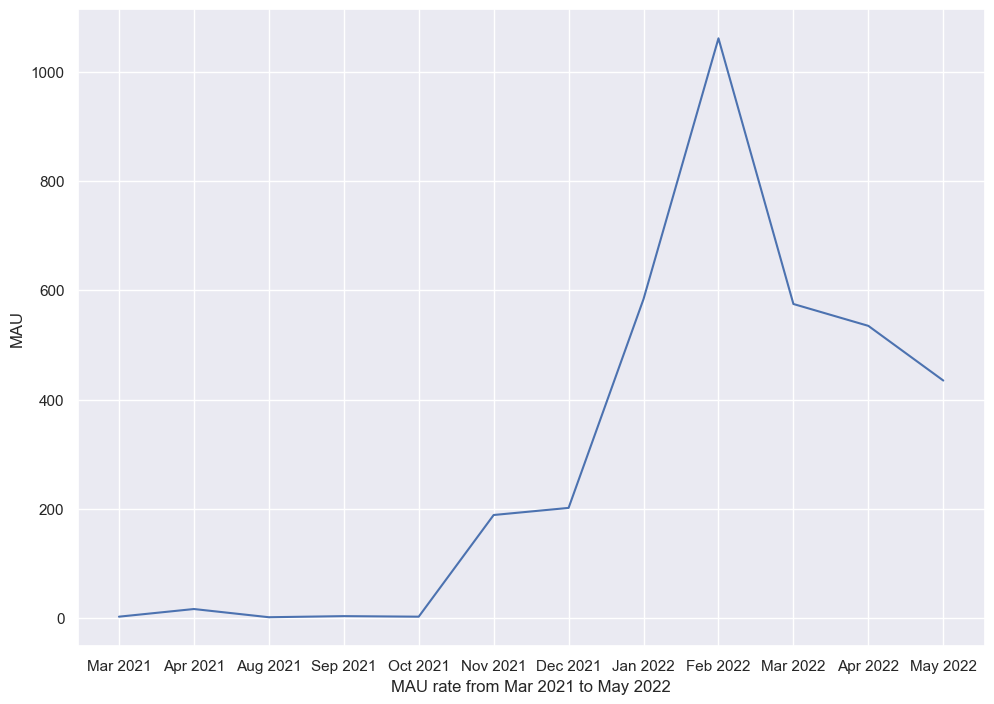

In [15]:
first_day = mau_check.sort_values(by=['month'])['str_month'][0]
last_day = mau_check.sort_values(by=['month'], ascending = False).reset_index(drop = True)['str_month'][0]
ax = sns.lineplot(mau_check, x = mau_check['str_month'], y = mau_check['mau'])
ax.set(xlabel=f'MAU rate from {first_day} to {last_day}', ylabel = 'MAU')
plt.show()

### 3.4 Рассчитываем активность пользователей для каждого дня недели

In [16]:
week_activity = '''
WITH activity as(
    SELECT created_at, user_id FROM codesubmit
    UNION ALL
    SELECT created_at, user_id FROM coderun
    UNION ALL
    SELECT created_at, user_id FROM teststart)
SELECT TO_CHAR(created_at, 'ID Dy') as day,
       COUNT(user_id) as activity
FROM activity
GROUP BY 1
'''
wa = pd.io.sql.read_sql(week_activity, con = engine)
wa

,day,activity
0,1 Mon,11854
1,2 Tue,11719
2,3 Wed,13593
3,4 Thu,13767
4,5 Fri,12272
5,6 Sat,9392
6,7 Sun,9475


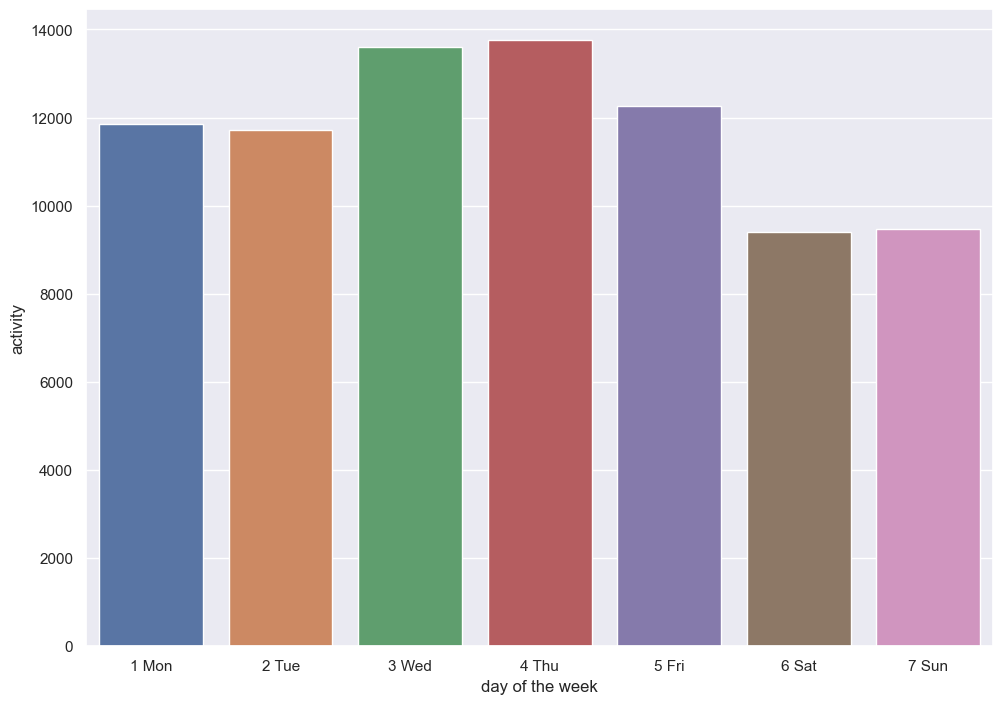

In [17]:
ax = sns.barplot(wa, x = 'day', y = 'activity')
ax.set(xlabel='day of the week', ylabel = 'activity')
plt.show()

### 3.5 Рассчитываем активность пользователей по времени суток

In [18]:
hours_activity = '''
WITH activity as(
    SELECT created_at, user_id FROM codesubmit
    UNION ALL
    SELECT created_at, user_id FROM coderun
    UNION ALL
    SELECT created_at, user_id FROM teststart)
SELECT TO_CHAR(created_at, 'HH24') as hour,
       COUNT(user_id) as activity
FROM activity
GROUP BY 1
'''
ha = pd.io.sql.read_sql(hours_activity, con = engine)
ha['hour'] = ha['hour'].astype(int)
ha.head()

,hour,activity
0,0,597
1,1,351
2,2,288
3,3,482
4,4,908


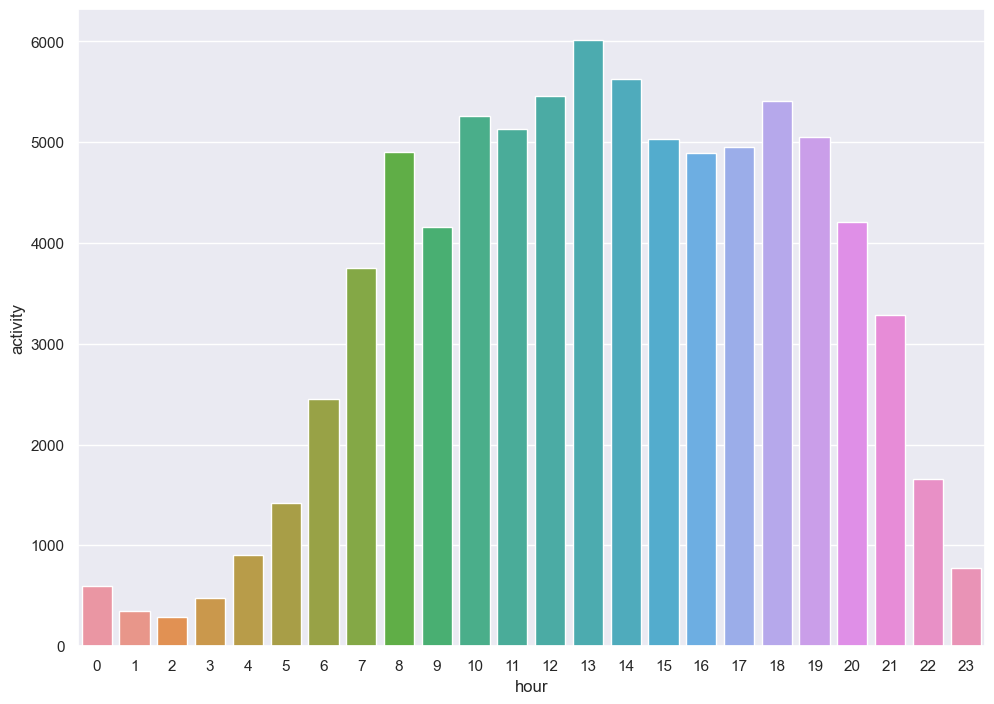

In [19]:
ax = sns.barplot(ha, x = 'hour', y = 'activity')
ax.set(xlabel='hour', ylabel = 'activity')
plt.show()

In [20]:
ha['hour'].describe()

count    24.000000
mean     11.500000
std       7.071068
min       0.000000
25%       5.750000
50%      11.500000
75%      17.250000
max      23.000000
Name: hour, dtype: float64

### 3.6 Рассчитываем N-day Retention

*N-Day Retention* - это метрика, которая показывает, какой процент новых пользователей вернулись в продукт в конкретный день с момента прихода.

In [21]:
nday_retention = '''
WITH prep as(
    SELECT TO_CHAR(u2.date_joined, 'MM') as month, 
           EXTRACT(days FROM u.entry_at-u2.date_joined) as diff,
           COUNT(DISTINCT user_id) as total 
    FROM userentry u
    JOIN users u2 ON u2.id = u.user_id
    WHERE TO_CHAR(u2.date_joined, 'YYYY') = '2022'
    AND extract(days from u.entry_at - u2.date_joined) IN (0, 1, 3, 7, 14, 30)
    GROUP BY month, diff)
SELECT TO_CHAR(TO_DATE(month, 'MM'), 'Month') as month,
       MAX(CASE WHEN diff = 0 THEN total END) as "0",
       MAX(CASE WHEN diff = 1 THEN total END) as "1",
       MAX(CASE WHEN diff = 3 THEN total END) as "3",
       MAX(CASE WHEN diff = 7 THEN total END) as "7",
       MAX(CASE WHEN diff = 14 THEN total END) as "14",
       MAX(CASE WHEN diff = 30 THEN total END) as "30"
FROM prep
GROUP BY month
'''
ret = pd.io.sql.read_sql(nday_retention, con = engine)
ret

,month,0,1,3,7,14,30
0,January,481,84,45,27,24,6
1,February,883,94,41,22,12,5
2,March,411,44,32,12,7,4
3,April,203,33,30,15,12,5


Посчитаем и в процентном соотношении:

In [22]:
nday_retention_percent = '''
WITH prep as(
    SELECT TO_CHAR(u2.date_joined, 'MM') as month, 
           EXTRACT(days FROM u.entry_at-u2.date_joined) as diff,
           COUNT(DISTINCT user_id) as total 
    FROM userentry u
    JOIN users u2 ON u2.id = u.user_id
    WHERE TO_CHAR(u2.date_joined, 'YYYY') = '2022'
    AND extract(days from u.entry_at - u2.date_joined) IN (0, 1, 3, 7, 14, 30)
    GROUP BY month, diff),
prep2 as(
    SELECT TO_CHAR(TO_DATE(month, 'MM'), 'Month') as month,
           MAX(CASE WHEN diff = 0 THEN total END) as "0",
           MAX(CASE WHEN diff = 1 THEN total END) as "1",
           MAX(CASE WHEN diff = 3 THEN total END) as "3",
           MAX(CASE WHEN diff = 7 THEN total END) as "7",
           MAX(CASE WHEN diff = 14 THEN total END) as "14",
           MAX(CASE WHEN diff = 30 THEN total END) as "30"
    FROM prep
GROUP BY month)
SELECT month, 
       MAX("0")/MAX("0")*100.0 as "0",
       ROUND(MAX("1")/MAX("0")::numeric*100, 2) as "1",
       ROUND(MAX("3")/MAX("0")::numeric*100, 2) as "3",
       ROUND(MAX("7")/MAX("0")::numeric*100, 2) as "7",
       ROUND(MAX("14")/MAX("0")::numeric*100, 2) as "14",
       ROUND(MAX("30")/MAX("0")::numeric*100, 2) as "30"
FROM prep2
GROUP BY month
'''
retention = pd.io.sql.read_sql(nday_retention_percent, con = engine)
retention

,month,0,1,3,7,14,30
0,April,100.0,16.26,14.78,7.39,5.91,2.46
1,February,100.0,10.65,4.64,2.49,1.36,0.57
2,January,100.0,17.46,9.36,5.61,4.99,1.25
3,March,100.0,10.71,7.79,2.92,1.70,0.97


In [23]:
retention['1'].mean()

13.770000000000001

Изменим формат таблицы с широкой на длинную

In [24]:
retention_long = retention.melt(id_vars= ['month'], var_name = 'day retention', value_name = 'amount')
retention_long

,month,day retention,amount
0,April,0,100.00
1,February,0,100.00
2,January,0,100.00
3,March,0,100.00
4,April,1,16.26
5,February,1,10.65
6,January,1,17.46
7,March,1,10.71
8,April,3,14.78
9,February,3,4.64


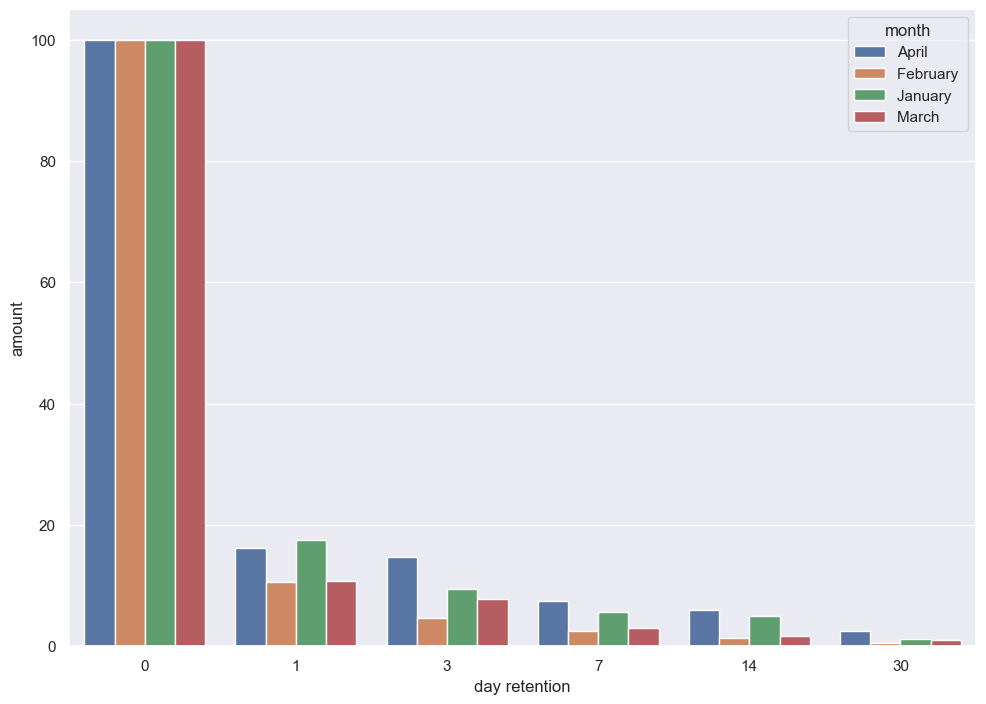

In [25]:
ax = sns.barplot(data=retention_long, x="day retention", y="amount", hue="month")
plt.show()

## Выводы:
* Большинство пользователей активны в промежутке с 8 до 20 часов
* Наиболее поплярные дни - среда и четверг
* Только 13% пользователей возвращаются на следующий день после регистрации, а 1.3% пользователей возвращаются на 30-ый день
* Рост числа посетителей сайт начинается только с октября, в преддверии релиза сайта